# Example copied and lightly adapted from https://github.com/adebayoj/fairml/blob/master/example.py

In [1]:
%matplotlib inline

/Users/raymondyee/anaconda/envs/myenv3/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Feature: Two_yr_Recidivism,	 Importance: 0.22893713545042127
Feature: Number_of_Priors,	 Importance: 0.3608230719377835
Feature: Age_Above_FourtyFive,	 Importance: -0.006804925469863901
Feature: Age_Below_TwentyFive,	 Importance: 0.15327284510693454
Feature: African_American,	 Importance: 0.23493195074530135
Feature: Asian,	 Importance: -0.0003240440699935191
Feature: Hispanic,	 Importance: -0.008425145819831496
Feature: Native_American,	 Importance: 0.0004860661049902787
Feature: Other,	 Importance: -0.004860661049902786
Feature: Female,	 Importance: 0.04536616979909268
Feature: Misdemeanor,	 Importance: -0.052657161373946854


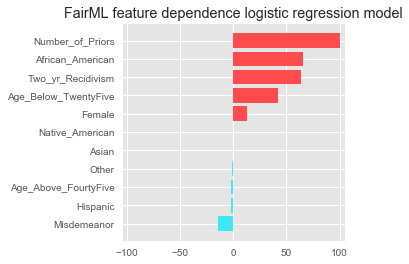

In [2]:
import matplotlib

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.linear_model import LogisticRegression

# import specific projection format.
from fairml import audit_model
from fairml import plot_dependencies

# plt.style.use('ggplot')
#plt.figure(figsize=(6, 6))

# read in propublica data
propublica_data = pd.read_csv("../doc/example_notebooks/"
                              "propublica_data_for_fairml.csv")

# quick data processing
compas_rating = propublica_data.score_factor.values
propublica_data = propublica_data.drop("score_factor", 1)

#  quick setup of Logistic regression
#  perhaps use a more crazy classifier
clf = LogisticRegression(penalty='l2', C=0.01)
clf.fit(propublica_data.values, compas_rating)

#  call audit model
importancies, _ = audit_model(clf.predict, propublica_data)

# print feature importance
print(importancies)

# generate feature dependence plot
fig = plot_dependencies(
    importancies.median(),
    reverse_values=False,
    title="FairML feature dependence logistic regression model"
)

# fig.show()
#file_name = "fairml_propublica_linear_direct.png"
#plt.savefig(file_name, transparent=False, bbox_inches='tight', dpi=250)

# non-linear example
https://github.com/adebayoj/fairml/blob/master/example_non_linear_models.py

**Warning:  Becase the following coe will not likely yield an immediate answer, you will need to turn the following markdown cell to a code cell to run it.**

```
%cd ..
%run example_non_linear_models.py
```